In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

In [3]:
with open('residuals.json') as f:
    residuals = json.load(f)

In [4]:
vbl_names = {'x':r'Predicted - true $x$ [um]', 'y':r'Predicted - true $y$ [um]', 'A':r'Predicted - true $\alpha$ [deg.]', 'B':r'Predicted - true $\beta$ [deg.]'}

In [46]:
def draw_one_vbl(vbl, x, d, ax_ii):
    
    x_array = [-1*x]
    y_array = [d['mean_'+vbl]]
    yerr_array = [[d['down68_'+vbl]],[d['up68_'+vbl]]]
    yerr2_array = [[d['mean_downsigma'+vbl]],[d['mean_upsigma'+vbl]]]
    
    line1 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr_array, color = colors[x], linestyle='')
    line2 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr2_array, elinewidth=10, alpha=0.2, color = colors[x], linestyle='')
    dot1 = ax_ii.scatter(y_array, x_array, marker='o', color = colors[x])

    ax_ii.set_xlabel(vbl_names[vbl])
    ax_ii.set_yticks([])

    return [line1,line2], [dot1]#,dot3,dot4]

def draw_one_vbl_slim(vbl, x, d, ax_ii):
    
    x_array = [-1*x]
    y_array = [d['mean_'+vbl]]
    yerr_array = [[d['down68_'+vbl]],[d['up68_'+vbl]]]
    
    line1 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr_array, color = colors[x], linestyle='')
    #line2 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr2_array, elinewidth=10, alpha=0.2, color = colors[x], linestyle='')
    dot1 = ax_ii.scatter(y_array, x_array, marker='o', color = colors[x])

    ax_ii.set_xlabel(vbl_names[vbl])
    ax_ii.set_yticks([])

    return [line1], [dot1]#,dot3,dot4]
    
def draw_one_model(x, d, ax, slim = False):

    if slim:
        line, dots = draw_one_vbl_slim('x', x, d, ax[0])
        line, dots = draw_one_vbl_slim('y', x, d, ax[1])
    else:
        line, dots = draw_one_vbl('x', x, d, ax[0])
        line, dots = draw_one_vbl('y', x, d, ax[1])

    return line, dots


In [53]:
def format_plot(ax, n_models=4, slim=False):
    ax[0].plot([0,0],[1,-1*n_models],color='gray', zorder=0)
    ax[1].plot([0,0],[1,-1*n_models],color='gray', zorder=0)

    # x limits
    ax[0].set_xlim(-15,15) # x
    ax[1].set_xlim(-5,5) # y
    
    ax[0].set_ylim(-1*n_models+0.5,0.5)
    ax[1].set_ylim(-1*n_models+0.5,0.5)

    ax[0].plot([50/np.sqrt(12),50/np.sqrt(12)],[-1*n_models+0.5,0.5],color='black',linestyle=':')
    ax[0].plot([-50/np.sqrt(12),-50/np.sqrt(12)],[-1*n_models+0.5,0.5],color='black',linestyle=':')
    ax[1].plot([12.5/np.sqrt(12),12.5/np.sqrt(12)],[-1*n_models+0.5,0.5],color='black',linestyle=':')
    ax[1].plot([-12.5/np.sqrt(12),-12.5/np.sqrt(12)],[-1*n_models+0.5,0.5],color='black',linestyle=':')

/tmp/ipykernel_1172984/603204930.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


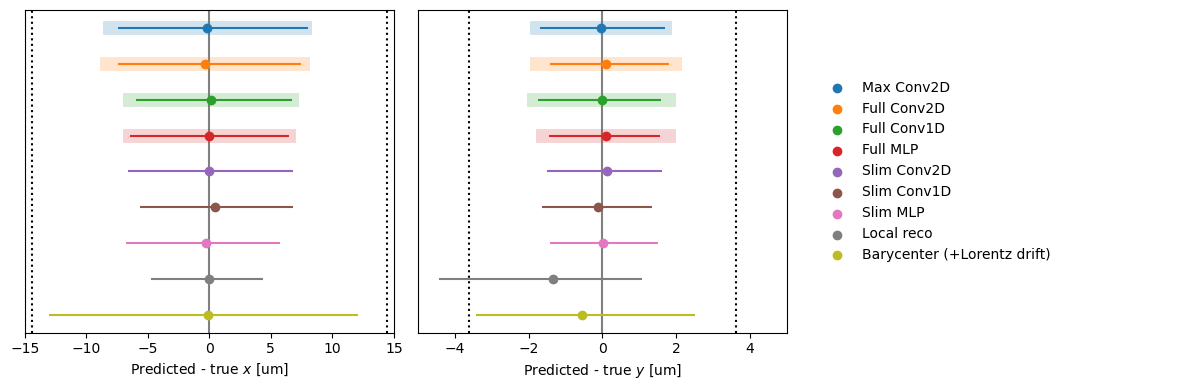

In [58]:
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True,constrained_layout=True)
ax[2].axis('off')

dots = []

models = [residuals["max_2dconv"]["2-noquant_2t"],
          residuals["full_2dconv"]["2-noquant_2t"],
          residuals["full_1dconv"]["2-noquant_2t"],
          residuals["full_mlp"]["2-noquant_2t"],
          residuals["slim_2dconv"]["2-noquant_2t"],
          residuals["slim_1dconv"]["2-noquant_2t"],
          residuals["slim_mlp"]["2-noquant_2t"],
         ]
format_plot(ax, 9)

for i,m in enumerate(models):

    slim = False
    if i >=4 and i <=6 :
        slim = True
    
    l, d = draw_one_model(i, m, ax, slim = slim)
    dots += d
    


    #x_array = [-1*x]
    #y_array = [d['mean_'+vbl]]
    #yerr_array = [[d['down68_'+vbl]],[d['up68_'+vbl]]]
    #yerr2_array = [[d['mean_downsigma'+vbl]],[d['mean_upsigma'+vbl]]]
    
    #line1 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr_array, color = colors[x], linestyle='')
    #line2 = ax_ii.errorbar(x = y_array, y = x_array, xerr=yerr2_array, elinewidth=10, alpha=0.2, color = colors[x], linestyle='')

ax[0].errorbar(x=[-0.02964286951883637], y = [-7], xerr=[[4.712738318072921],[4.384828255893909]], color=colors[7])
dots += [ax[0].scatter(x=[-0.02964286951883637], y = [-7], marker='o', color=colors[7])]

ax[1].errorbar(x=[-1.3300463382878323], y = [-7], xerr=[[3.0986569596411773],[2.408445954889398]], color=colors[7])
ax[1].scatter(x=[-1.3300463382878323], y = [-7], marker='o', color=colors[7])

ax[0].errorbar(x=[-0.09279213645228232], y = [-8], xerr=[[12.911197621251297],[12.185558364110882]], color=colors[8])
dots += [ax[0].scatter(x=[-0.09279213645228232], y = [-8], marker='o', color=colors[8])]


ax[1].errorbar(x=[-0.5636358480934232], y = [-8], xerr=[[2.8459339863505595],[3.0855832481540264]], color=colors[8])
ax[1].scatter(x=[-0.5636358480934232], y = [-8], marker='o', color=colors[8])

#ax[0][0].legend(lines,[names[l] for l in labels],frameon=False,loc='center left')
ax[2].legend(dots,['Max Conv2D','Full Conv2D','Full Conv1D','Full MLP','Slim Conv2D','Slim Conv1D','Slim MLP','Local reco','Barycenter (+Lorentz drift)'],frameon=False,loc='center left')


plt.tight_layout()

plt.savefig("plots/all.pdf")
plt.savefig("plots/all.png")

plt.show()